<a href="https://colab.research.google.com/github/vapaul10/bank_marketing_analysis/blob/main/Bank_Marketing_Analysis_by_Valeri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Bank Marketing Analysis**###
######Valeri Paul, Ed.D###


######**DESC 624**### 
###### Use of Logistic Regression and Random Forest######



In [ ]:
#!pip3 install rpy2
#%load_ext rpy2.ipython

In [ ]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


#**I. Python Setup Section**

---



In [ ]:
##Python Packages
import pandas as pd
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import seaborn as sns
import numpy as np
from scipy import stats

In [ ]:
#Install python datatable which is the same as data.table() in R
!pip install datatable
import datatable as dt

from datatable import (dt, f, by, ifelse, update, sort,
                       count, min, max, mean, sum, rowsum)

     |████████████████████████████████| 83.9MB 37kB/s 


In [ ]:
#Python h2o

#h2o is the Machine Learning package we will be using.
# It has both an R implementation and a Python implemenation. 
#The h2o.init() is commented out below because we are 
#not going to use it for this HW.  You can only have on instance (either Python or R)
#of h2o running in any one session. 

! pip install h2o

import h2o

#h2o.init()
#h2o.shutdown()

     |████████████████████████████████| 164.8MB 86kB/s 
  Created wheel for h2o: filename=h2o-3.32.1.3-py2.py3-none-any.whl size=164854343 sha256=43daad45af4b7d3c8b05c2cddb5915290e737131ea85f860ddb8980abff270e3
  Stored in directory: /root/.cache/pip/wheels/4f/bb/82/0988682f9abd0b5e95109a4aae6793dd427173b6dc671d9252
Successfully built h2o


#**II. Python Data Loading**

In [ ]:
#Data Load in Python
bank_p = dt.fread("https://raw.githubusercontent.com/jjghockey/DESC624/main/bank-full.csv")
###  bank_p = dt.fread("https://raw.githubusercontent.com/vapaul10/DESC624PredictiveAnalytics/Datasets/bank-full.csv")  #incase prof jjg link doesn't work.  This a backup link to same data on my github.
print(bank_p.head())
print(bank_p.shape)


   | age  job           marital   education  default  balance  housing  loan  contact  day  …  campaign  pdays  previous  poutcome  y 
-- + ---  ------------  --------  ---------  -------  -------  -------  ----  -------  ---     --------  -----  --------  --------  --
 0 |  58  management    married   tertiary   no          2143  yes      no    unknown    5  …         1     -1         0  unknown   no
 1 |  44  technician    single    secondary  no            29  yes      no    unknown    5  …         1     -1         0  unknown   no
 2 |  33  entrepreneur  married   secondary  no             2  yes      yes   unknown    5  …         1     -1         0  unknown   no
 3 |  47  blue-collar   married   unknown    no          1506  yes      no    unknown    5  …         1     -1         0  unknown   no
 4 |  33  unknown       single    unknown    no             1  no       no    unknown    5  …         1     -1         0  unknown   no
 5 |  35  management    married   tertiary   no        

#**III. Python Data Exploration**

Pythons function for summary() only uses numeric values, so you will have to build categorical tables on your own.

In [ ]:
bank_p.names

('age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y')

Categorical tables using python

In [ ]:
bank_p['count'] = 1  #Build a new variable in order to count rows in the data
bank_p[f.y=="yes",'y1']=1
bank_p[f.y=="no",'y1']=0

bank_p[:, sum(f.count), by('y', 'y1')]  #Recode y into a 0/1 dummy variable. this is for classification later.

   | y    y1  count
-- + ---  --  -----
 0 | no    0  39922
 1 | yes   1   5289

[2 rows x 3 columns]


,y,y1,count
,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪
0,no,0,39922
1,yes,1,5289


In [ ]:
bank_pd=bank_p.to_pandas()  #Use this to convert a datatable object into a pandas object. 
summary = bank_pd.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
count,45211.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
y1,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0


In [ ]:
bank_pd.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,count,y1
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,0


In [ ]:
bank_p[:, sum(f.count), by('marital') ]  #Summary table of Marital Status

   | marital   count
-- + --------  -----
 0 | divorced   5207
 1 | married   27214
 2 | single    12790

[3 rows x 2 columns]


,marital,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,divorced,5207
1,married,27214
2,single,12790


In [ ]:
bank_p[:, sum(f.count), by('job') ] #Summary table of job/work 

   | job            count
-- + -------------  -----
 0 | admin.          5171
 1 | blue-collar     9732
 2 | entrepreneur    1487
 3 | housemaid       1240
 4 | management      9458
 5 | retired         2264
 6 | self-employed   1579
 7 | services        4154
 8 | student          938
 9 | technician      7597
10 | unemployed      1303
11 | unknown          288

[12 rows x 2 columns]


,job,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,admin.,5171
1,blue-collar,9732
2,entrepreneur,1487
3,housemaid,1240
4,management,9458
5,retired,2264
6,self-employed,1579
7,services,4154
8,student,938


In [ ]:
bank_p[:, sum(f.count), by('education') ] #Summary table of education 

   | education  count
-- + ---------  -----
 0 | primary     6851
 1 | secondary  23202
 2 | tertiary   13301
 3 | unknown     1857

[4 rows x 2 columns]


,education,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,primary,6851
1,secondary,23202
2,tertiary,13301
3,unknown,1857


In [ ]:
bank_p[:, sum(f.count), by('default') ] #Summary table of default

   | default  count
-- + -------  -----
 0 | no       44396
 1 | yes        815

[2 rows x 2 columns]


,default,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,no,44396
1,yes,815


In [ ]:
bank_p[:, sum(f.count), by('housing') ] #Summary table of housing

   | housing  count
-- + -------  -----
 0 | no       20081
 1 | yes      25130

[2 rows x 2 columns]


,housing,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,no,20081
1,yes,25130


In [ ]:
bank_p[:, sum(f.count), by('loan') ] #Summary table of loan

   | loan  count
-- + ----  -----
 0 | no    37967
 1 | yes    7244

[2 rows x 2 columns]


,loan,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,no,37967
1,yes,7244


In [ ]:
bank_p[:, sum(f.count), by('contact') ] #Summary table of contact 

   | contact    count
-- + ---------  -----
 0 | cellular   29285
 1 | telephone   2906
 2 | unknown    13020

[3 rows x 2 columns]


,contact,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,cellular,29285
1,telephone,2906
2,unknown,13020


In [ ]:
bank_p[:, sum(f.count), by('day') ] #Summary table of month

   | day  count
-- + ---  -----
 0 |   1    322
 1 |   2   1293
 2 |   3   1079
 3 |   4   1445
 4 |   5   1910
 5 |   6   1932
 6 |   7   1817
 7 |   8   1842
 8 |   9   1561
 9 |  10    524
10 |  11   1479
11 |  12   1603
12 |  13   1585
13 |  14   1848
14 |  15   1703
 … |   …      …
26 |  27   1121
27 |  28   1830
28 |  29   1745
29 |  30   1566
30 |  31    643

[31 rows x 2 columns]


,day,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,1,322
1,2,1293
2,3,1079
3,4,1445
4,5,1910
5,6,1932
6,7,1817
7,8,1842
8,9,1561


In [ ]:
bank_p[:, sum(f.count), by('month') ] #Summary table of month

   | month  count
-- + -----  -----
 0 | apr     2932
 1 | aug     6247
 2 | dec      214
 3 | feb     2649
 4 | jan     1403
 5 | jul     6895
 6 | jun     5341
 7 | mar      477
 8 | may    13766
 9 | nov     3970
10 | oct      738
11 | sep      579

[12 rows x 2 columns]


,month,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,apr,2932
1,aug,6247
2,dec,214
3,feb,2649
4,jan,1403
5,jul,6895
6,jun,5341
7,mar,477
8,may,13766


In [ ]:
bank_p[:, sum(f.count), by('poutcome') ] #Summary table of month

   | poutcome  count
-- + --------  -----
 0 | failure    4901
 1 | other      1840
 2 | success    1511
 3 | unknown   36959

[4 rows x 2 columns]


,poutcome,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,failure,4901
1,other,1840
2,success,1511
3,unknown,36959


In [ ]:
#bank_pd=bank_p.to_pandas()  #Use this to convert datatable into Pandas
#bank_p=dt.Frame(bank_pd) #Use this to convert Pandas into datatable

I want you to describe two additional features you think are useful for the model and why you think they are useful. Bring in outside research if necessary.  You need to create the features in either R or Python.  These features should be included in your models.

**Feature 1**



**Feature 2**







In [ ]:
## Feature 1
###  See below in Sections A and C.  

In [ ]:
## Feature 2
###  See below in Sections A and C.

#**IV. Python Data Processing**

In [ ]:
#IV. Data Processing --------------------------------------------
#A. Adjust values based on the review of the data
import numpy as np
bank_pd = bank_p.to_pandas()
bank_pd['pdays'] = bank_pd['pdays'].replace({999: np.NaN})
bank_pd.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,count,y1
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,0


In [ ]:
bank_p=dt.Frame(bank_pd)
bank_p.head()

   | age  job           marital   education  default  balance  housing  loan  contact  …  prev…  poutcome  y   count  y1
-- + ---  ------------  --------  ---------  -------  -------  -------  ----  -------     -----  --------  --  -----  --
 0 |  58  management    married   tertiary   no          2143  yes      no    unknown  …      0  unknown   no      1   0
 1 |  44  technician    single    secondary  no            29  yes      no    unknown  …      0  unknown   no      1   0
 2 |  33  entrepreneur  married   secondary  no             2  yes      yes   unknown  …      0  unknown   no      1   0
 3 |  47  blue-collar   married   unknown    no          1506  yes      no    unknown  …      0  unknown   no      1   0
 4 |  33  unknown       single    unknown    no             1  no       no    unknown  …      0  unknown   no      1   0
 5 |  35  management    married   tertiary   no           231  yes      no    unknown  …      0  unknown   no      1   0
 6 |  28  management    single  

,age,job,marital,education,default,balance,housing,loan,contact,day,…,previous,poutcome,y,count,y1
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,…,0,unknown,no,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,…,0,unknown,no,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,…,0,unknown,no,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,…,0,unknown,no,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,…,0,unknown,no,1,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,…,0,unknown,no,1,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,…,0,unknown,no,1,0
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,…,0,unknown,no,1,0
8,58,retired,married,primary,no,121,yes,no,unknown,5,…,0,unknown,no,1,0


#### ##  a) College Education
b) OnTimePayer, c) Age, d) Married2, e) Savings

In [ ]:
#IVa. Data Processing -----------------------------------
#A. Clean Data Education  (different than last time)
bank_p[f.education== 'tertiary', 'CollegeEducation']= 'Yes'
bank_p[f.education== 'secondary', 'CollegeEducation']= 'No'
bank_p[f.education== 'unknown', 'CollegeEducation'] = 'No'
bank_p[f.education== 'primary', 'CollegeEducation'] = 'No'
print(bank_p[:, sum(f.count), by (['CollegeEducation'])])

   | CollegeEducation  count
-- + ----------------  -----
 0 | No                31910
 1 | Yes               13301

[2 rows x 2 columns]



In [ ]:
bank_p[:, sum(f.count), by(['education', 'CollegeEducation'])]

   | education  CollegeEducation  count
-- + ---------  ----------------  -----
 0 | primary    No                 6851
 1 | secondary  No                23202
 2 | tertiary   Yes               13301
 3 | unknown    No                 1857

[4 rows x 3 columns]


,education,CollegeEducation,count
,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪
0,primary,No,6851
1,secondary,No,23202
2,tertiary,Yes,13301
3,unknown,No,1857


#### ## b) OnTimePayer
a) College Education, c) Age, d) Married2, e) Savings

In [ ]:
#IV. Data Processing -----------------------------------
#A. Clean Data default to OnTimePayer (it is same as default, I just trial & error. )
bank_p[f.default=="yes", 'OnTimePayer']= 'Yes'
bank_p[f.default=="no", 'OnTimePayer']= 'No'

print(bank_p[:, sum(f.count), by(['OnTimePayer'])])
bank_p.shape

   | OnTimePayer  count
-- + -----------  -----
 0 | No           44396
 1 | Yes            815

[2 rows x 2 columns]



(45211, 21)

#### ## c) Age
a) College Education b) OnTimePayer, d) Married2, e) Savings

In [ ]:
#C. Build Additional Features
#Feature C2c - Age (UPDATED from last time)
bank_p[f.age<=17, 'Age'] = '<=17'
bank_p[(f.age>=18) & (f.age<=29), 'Age'] = ' 1)  18 to 29'
bank_p[(f.age>=30) & (f.age<=49), 'Age'] = ' 2)  30 to 49'
bank_p[(f.age>=50) & (f.age<=64), 'Age'] = ' 3)  50 to 64'
bank_p[f.age>=65, 'Age']  = ' 5)  >= 65'
bank_p[:, sum(f.count), by('Age') ]

   | Age            count
-- + -------------  -----
 0 |  1)  18 to 29   5273
 1 |  2)  30 to 49  29744
 2 |  3)  50 to 64   9384
 3 |  5)  >= 65       810

[4 rows x 2 columns]


,Age,count
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,1) 18 to 29,5273
1,2) 30 to 49,29744
2,3) 50 to 64,9384
3,5) >= 65,810


#### ## b) OnTimePayer
a) College Education, c) Age, d) Married2, e) Savings

#### ##  d) Married2
a) College Education b) OnTimePayer, c) Age, e) Savings

In [ ]:
#IVd. Data Processing -----------------------------------
#A. Clean Data Martial 
bank_p[f.marital=="divorced", 'Married2']= 'No'
bank_p[f.marital=="single", 'Married2']= 'No'
bank_p[f.marital=="married", 'Married2']= 'Yes'

print(bank_p[:, sum(f.count), by(['Married2'])])
bank_p.shape

   | Married2  count
-- + --------  -----
 0 | No        17997
 1 | Yes       27214

[2 rows x 2 columns]



(45211, 23)

#### ## d) Married2 (extra)
a) College Education b) OnTimePayer, c) Age, e) Savings

In [ ]:
#IVb. Data Processing -----------------------------------
#A. Clean Data Martial <seeking to be binary >
bank_p[f.marital== 'married', 'Married']= 'Yes'
bank_p[f.marital== 'single', 'Not Married']= 'No'
bank_p[f.marital== 'divorced', 'Not Married']= 'No'
print(bank_p[:, sum(f.count), by (['Married', 'Not Married'])])
bank_p.shape

   | Married  Not Married  count
-- + -------  -----------  -----
 0 | NA       No           17997
 1 | Yes      NA           27214

[2 rows x 3 columns]



(45211, 25)

#### ## e) Savings
a) College Education b) OnTimePayer, c) Age, d) Married2


In [ ]:
## #IVd. Data Processing -----------------------------------
#A. Clean Data account to Savings
# Holding a balance in their Account
bank_p[f.balance <=999, 'Savings']= 'No'
bank_p[f.balance  >=1000, 'Savings']= 'Yes'

print(bank_p[:, sum(f.count), by(['Savings'])])
bank_p.shape

   | Savings  count
-- + -------  -----
 0 | No       30569
 1 | Yes      14642

[2 rows x 2 columns]



(45211, 26)

In [ ]:
# bank_pd = bank_p.to_pandas()  #Use this to convert datatable into Pandas
# bank_p = dt.Frame(bank_pd) #Use this to convert Pandas into datatable

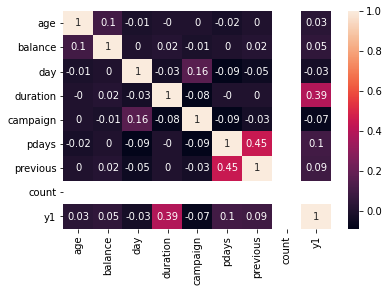

In [ ]:
#C. Build Additional Features


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from inspect import signature

import sklearn
from sklearn import linear_model, dummy, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.image as pltimg

In [ ]:
#B. Filter the data


#### ## C.  Build Features
####### a) education, b) default, c) age,  d) martial, e) balance
#######  a) College Education, b) OnTimePayer, c) Age, d) Married2, e) Savings

In [ ]:
#C1. Build additional features
from scipy import stats
bank_p['previous_norm'] = stats.zscore(bank_p['previous'])
bank_p[:,'campaign_norm'] = stats.zscore(bank_p['campaign'])

In [ ]:
#bank_p=dt.Frame(bank_pd)
bank_pd=bank_p.to_pandas()  #Use this to convert datatable into Pandas
bank_pd.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,count,y1,CollegeEducation,OnTimePayer,Age,Married2,Married,Not Married,Savings,previous_norm,campaign_norm
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,1,0,Yes,No,3) 50 to 64,Yes,Yes,NaN,Yes,-0.25194,-0.569351
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,1,0,No,No,2) 30 to 49,No,NaN,No,No,-0.25194,-0.569351
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1,0,No,No,2) 30 to 49,Yes,Yes,NaN,No,-0.25194,-0.569351
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,1,0,No,No,2) 30 to 49,Yes,Yes,NaN,Yes,-0.25194,-0.569351
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1,0,No,No,2) 30 to 49,No,NaN,No,No,-0.25194,-0.569351


#### ## a) College Education,
 b) OnTimePayer, c) Age, d) Married2, e) Savings

y                       no       yes
CollegeEducation                    
No                0.896804  0.103196
Yes               0.849936  0.150064


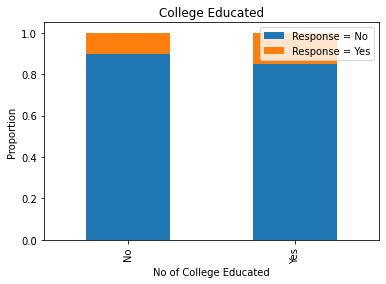

In [ ]:
#C. Build Additional Features
#Feature 2a - College Educated in the Crosstab
crosstab_01 = pd.crosstab(bank_pd['CollegeEducation'], bank_pd['y'])
crosstab_norm = crosstab_01.div(crosstab_01.sum(1),axis =0)
print(crosstab_norm)
crosstab_norm.plot(kind='bar', stacked = True)
plt.legend(['Response = No','Response = Yes'])
plt.title('College Educated')
plt.xlabel('No of College Educated'); plt.ylabel('Proportion');plt.show()

#### ## b) OnTimePayer
##### a) College Education, c) Age, d) Married2, e) Savings

y                  no       yes
OnTimePayer                    
No           0.882039  0.117961
Yes          0.936196  0.063804


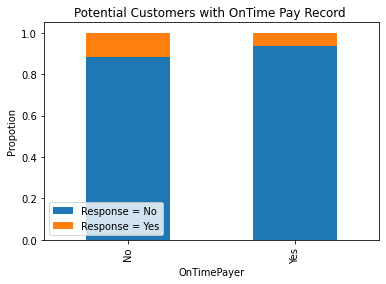

In [ ]:
#C. Build Additional Features
#Feature 2b - OnTimePayers in Crosstabs
bank_pd=bank_p.to_pandas()
crosstab_02 = pd.crosstab(bank_pd['OnTimePayer'], bank_pd['y'])
crosstab_norm = crosstab_02.div(crosstab_02.sum(1),axis =0)
print(crosstab_norm)
crosstab_norm.plot(kind='bar', stacked = True)
plt.legend(['Response = No','Response = Yes'])
plt.title('Potential Customers with OnTime Pay Record ')
plt.xlabel('OnTimePayer'); plt.ylabel('Propotion');plt.show()

#### ## c) Age
##### a) College Education, b) OnTimePayer, d) Married2, e) Savings

y                    no       yes
Age                              
 1)  18 to 29  0.824009  0.175991
 2)  30 to 49  0.899946  0.100054
 3)  50 to 64  0.888747  0.111253
 5)  >= 65     0.579012  0.420988


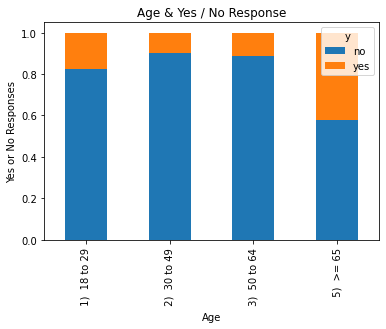

In [ ]:
#C. Build Additional Features
#Feature 2c - Age in Crosstab
bank_pd=bank_p.to_pandas()
crosstab_03 = pd.crosstab(bank_pd['Age'], bank_pd['y'])
crosstab_norm = crosstab_03.div(crosstab_03.sum(1), axis = 0)
print(crosstab_norm)
crosstab_norm.plot(kind='bar', stacked = True)
#
#plt.legend(['Age Range for 'No' Response', 'Age Range for 'Yes' Response'])
plt.title('Age & Yes / No Response')
plt.xlabel('Age'); plt.ylabel('Yes or No Responses'); plt.show()

#### ## d) Married2
#### ### a) College Education, b) OnTimePayer, c) Age, e) Savings

In [ ]:
# C. Build Additional Features
# Feature C2d - Married #IVc. Data Processing -----------------------------------
#A. Clean Data Martial 
bank_p[f.marital=="divorced", 'Married2']= 'No'
bank_p[f.marital=="single", 'Married2']= 'No'
bank_p[f.marital=="married", 'Married2']= 'Yes'

print(bank_p[:, sum(f.count), by(['Married2'])])
bank_p.shape


   | Married2  count
-- + --------  -----
 0 | No        17997
 1 | Yes       27214

[2 rows x 2 columns]



(45211, 28)

y               no       yes
Married2                    
No        0.859199  0.140801
Yes       0.898765  0.101235


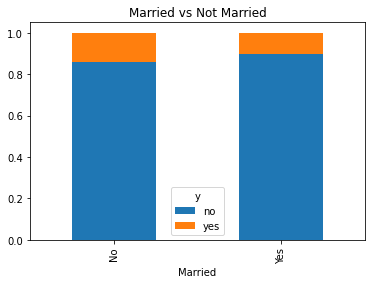

In [ ]:
#C. Build Additional Features
#Feature 2d - Married2 in Crosstab
bank_pd=bank_p.to_pandas()
crosstab_04 = pd.crosstab(bank_pd['Married2'], bank_pd['y'])
crosstab_norm = crosstab_04.div(crosstab_04.sum(1), axis = 0)
print(crosstab_norm)
crosstab_norm.plot(kind='bar', stacked = True)
#
#plt.legend(['Not Married', 'Married'])
plt.title('Married vs Not Married')
plt.xlabel('Married'); plt.ylabel(''); plt.show()

#### ## e) Savings
#### ## a) College Education, b) OnTimePayer, c) Age, d) Married2

y              no       yes
Savings                    
No       0.900684  0.099316
Yes      0.846128  0.153872


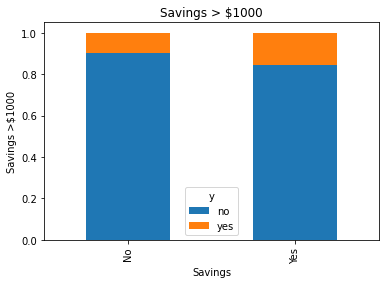

In [ ]:
#C Build additional features
#Feature 2d - Savings Crosstab
bank_pd=bank_p.to_pandas()
crosstab_05 = pd.crosstab(bank_pd['Savings'], bank_pd['y'])
crosstab_norm = crosstab_05.div(crosstab_05.sum(1), axis = 0)
print(crosstab_norm)
crosstab_norm.plot(kind='bar', stacked = True)
#
#plt.legend(['Savings <=$999', 'Savings >=$1000'])
plt.title('Savings > $1000')
plt.xlabel('Savings'); plt.ylabel('Savings >$1000'); plt.show()

In [ ]:
#bank_pd=bank_p.to_pandas()  #Use this to convert datatable into Pandas
#bank_p=dt.Frame(bank_pd) #Use this to convert Pandas into datatable

#**V. Python Data Analysis**

##You need to create and run different models. One for Random Forest and one for Logisitic Regression.##

**If your model from HW #1 was not very strong, you need to consider new features and/or additional features for these models.  I will be comparing your results and I am going to want to see improvement in the AUC.  However, if your HW #1 model already had a strong AUC (>0.70), then you no dont need to necessarily consider additional features.**

In [ ]:
import h2o

h2o.init()
#h2o.shutdown()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,4 hours 49 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_ouxxz6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.066 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


### Zone of Trial and Error on y = variable

In [ ]:
# bank_p=dt.Frame(bank_pd)
bank_pd = bank_p.to_pandas()  #Use this to convert datatable into Pandas

In [ ]:
#bank_p.names

In [ ]:
from sklearn.metrics import accuracy_score  #  accuracy is good at 88%.  But it doesn't tell how model will perform
from sklearn import metrics

bank_p['count'] = 1  #Build a new variable in order to count rows in the data
bank_p[f.y=="yes",'y1']=1
bank_p[f.y=="no",'y1']=0

bank_p[:, sum(f.count), by('y', 'y1')]  #Recode y into a 0/1 dummy variable. this is for classification later.

   | y    y1  count
-- + ---  --  -----
 0 | no    0  39922
 1 | yes   1   5289

[2 rows x 3 columns]


,y,y1,count
,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪
0,no,0,39922
1,yes,1,5289


### a) College Education, b) OnTimePayer, c) Age, d) Married2, e) Savings

In [ ]:
#A. Prepare data for h2o
bank_pd = bank_p.to_pandas()  # This line of code will convert the bank_p object into a bank_pd
                              # object. 
                              # the rest of the code relies on a bank_pd object. However, 
                              # if you made changes to a bank_pd object above that you want retained
                              # and did not make any changes to the bank_p object.
                              #  Comment this line out.
                                
#Convert variables to factor variables for modeling
bank_pd['job'],_=pd.factorize(bank_pd['job'], sort=True)
bank_pd['marital'],_=pd.factorize(bank_pd['marital'], sort=True)
bank_pd['education'],_=pd.factorize(bank_pd['education'], sort=True)
bank_pd['default'],_=pd.factorize(bank_pd['default'], sort=True)
bank_pd['housing'],_=pd.factorize(bank_pd['housing'], sort=True)
bank_pd['loan'],_=pd.factorize(bank_pd['loan'], sort=True)
bank_pd['poutcome'],_=pd.factorize(bank_pd['poutcome'], sort=True)
bank_pd['contact'],_=pd.factorize(bank_pd['contact'], sort=True)
bank_pd['month'],_=pd.factorize(bank_pd['month'], sort=True)
bank_pd['CollegeEducation'],_=pd.factorize(bank_pd['CollegeEducation'], sort=True)  # Made this feature
bank_pd['OnTimePayer'],_=pd.factorize(bank_pd['OnTimePayer'], sort=True)  # Made this feature
bank_pd['Age'],_=pd.factorize(bank_pd['Age'], sort=True)  #  Made this feature
bank_pd['Married2'],_=pd.factorize(bank_pd['Married2'], sort=True)  #  Made this feature
bank_pd['Savings'],_=pd.factorize(bank_pd['Savings'], sort=True)  # Made this feature
bank_pd['y'],_=pd.factorize(bank_pd['y'], sort=True)

# Creating a dataframe with X%
# values of original dataframe
bank_pd_trn = bank_pd.sample(frac = 0.80)  #Put the percentage split here
  
# Creating dataframe with 
# rest of the X% values
bank_pd_tst = bank_pd.drop(bank_pd_trn.index)

bank_pd_tst.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,count,y1,CollegeEducation,OnTimePayer,Age,Married2,Savings,previous_norm,campaign_norm
count,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.00000,9042.000000,9042.000000,9042.0,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000,9042.000000
mean,40.841075,4.359213,1.173634,1.234904,0.019244,1369.548994,0.555629,0.155386,0.641009,15.976001,5.511723,257.956757,2.763437,41.443818,0.62077,2.549325,0.114134,1.0,0.114134,0.304579,0.019244,1.123313,0.593232,0.324154,0.017559,-0.000130
std,10.550664,3.261105,0.613727,0.750995,0.137387,3028.731471,0.496923,0.362292,0.899355,8.366691,3.000042,255.652090,3.082162,102.237094,3.44535,0.999641,0.317992,0.0,0.317992,0.460254,0.137387,0.609760,0.491258,0.468084,1.495757,0.994892
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,-1.000000,0.00000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.251940,-0.569351
25%,33.000000,1.000000,1.000000,1.000000,0.000000,70.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,-1.000000,0.00000,3.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.251940,-0.569351
50%,39.000000,4.000000,1.000000,1.000000,0.000000,452.500000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.00000,3.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-0.251940,-0.246560
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1418.250000,1.000000,0.000000,2.000000,22.000000,8.000000,316.750000,3.000000,-1.000000,0.00000,3.000000,0.000000,1.0,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,-0.251940,0.076230
max,93.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3785.000000,63.000000,854.000000,275.00000,3.000000,1.000000,1.0,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,119.135982,19.443647


In [ ]:
bank_pd_tst.shape
print(bank_pd_tst.describe)

<bound method NDFrame.describe of        age  job  marital  ...  Savings  previous_norm  campaign_norm
6       28    4        2  ...        0      -0.251940      -0.569351
13      58    9        1  ...        0      -0.251940      -0.569351
24      40    5        1  ...        0      -0.251940      -0.569351
27      52    2        1  ...        0      -0.251940      -0.569351
32      60    0        1  ...        0      -0.251940      -0.569351
...    ...  ...      ...  ...      ...            ...            ...
45182   34    9        1  ...        0       1.918749      -0.246560
45190   32    1        1  ...        0       1.050473      -0.569351
45192   29    4        2  ...        0      -0.251940      -0.569351
45196   25    8        2  ...        0      -0.251940      -0.569351
45202   34    0        2  ...        0      -0.251940      -0.569351

[9042 rows x 28 columns]>


In [ ]:
bank_pd_trn.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,count,y1,CollegeEducation,OnTimePayer,Age,Married2,Savings,previous_norm,campaign_norm
count,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.0,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000,36169.000000
mean,40.959993,4.334900,1.166247,1.222290,0.017722,1360.452874,0.555890,0.161437,0.640051,15.764024,5.525837,258.214659,2.763941,39.886339,0.570212,2.562637,0.117697,1.0,0.117697,0.291603,0.017722,1.127623,0.604108,0.323786,-0.004390,0.000033
std,10.635730,3.275565,0.606847,0.747235,0.131942,3048.800123,0.496873,0.367938,0.897612,8.310961,3.008660,257.998088,3.102015,99.593701,1.914291,0.986392,0.322254,0.0,0.322254,0.454507,0.131942,0.617899,0.489048,0.467926,0.831066,1.001300
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.251940,-0.569351
25%,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.251940,-0.569351
50%,39.000000,4.000000,1.000000,1.000000,0.000000,447.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-0.251940,-0.246560
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1430.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000,1.0,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,-0.251940,0.076230
max,95.000000,11.000000,2.000000,3.000000,1.000000,98417.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,58.000000,871.000000,58.000000,3.000000,1.000000,1.0,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,24.928058,17.829696


In [ ]:
#Put your predictors here, separated by commas. Each predictor needs to be enclosed in single quotes
## # line 63 in HWK1
trn = bank_pd_trn.loc[:,[ 'y', 'Married2', 'OnTimePayer', 'Age', 'Savings', 'CollegeEducation', 'poutcome']]
tst = bank_pd_tst.loc[:,[ 'y', 'Married2', 'OnTimePayer', 'Age', 'Savings', 'CollegeEducation', 'poutcome']]

In [ ]:
#Load data into h2o
trn_h = h2o.H2OFrame(trn)
tst_h = h2o.H2OFrame(tst)

x = trn_h.columns
y = "y"
x.remove(y)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


#### 6. Response variable MUST be a factor variable
##### > PCA helps identifies variables with predictor-set variation without
##### > regard to any further understanding of the predictors
##### >  (i.e., measurement scales or distributions) or  important 
##### > relationships within dataset and model.  As a result, it is important 
##### > for an analyst to know this about PCA, in order to avoid the
##### > characteristics of the data to be modeled in a way that is irrelevant
##### >to the underlying structure.

##### > Also, PCA does not consider the modeling objective or response variable
##### > when summarizing variability.It is blind or unsuperivised technique.
##### > As a result the predictive relationship between the predictors and the
##### > response is not connected to the predictors’ variability.  Then the
##### > derived PCs will not provide a suitable relationship for the analysis. 
##### > (Kuhn 2018 p. 37)

##### > Factor variables are not binary. Factor variables are used because
##### > binary variables are treated as numerical data and the model will 
##### > estimate the probability density function  Pr[X] from a continuous 
##### > distribution, like Gaussian.


# More Questions

##### 1. What are tuning parameters?


In [ ]:
## Tuning is a way of optimizing your model. After an analyst splits the data 
## ## into test and train datasets, there is phase of setup where you make sure
## ##  data is random, as well as balanced data and that the analyst calibrate 
## ##  the model with a baseline performance.

## ## Then the analyst will seek to tune the model.
## ## The tuning is conducted in the modeling phase, where the analyst applies
## ## algorithms to determine beneficial relationships in the data.
## ## The goal in this modeling phase is the make sure the model outperforms
## ## the baseline models. The tuning part is the identifing algorithms that
## ## optimize the model's performance. This is necessary because an analyst 
## ## cannot estimate the important parameters of the model just from the data.
## ## A tuning parameter is used because an analyst needs to control 
## ## the complexity of the model and avoid poor value choices and
## ##  reduce overfitting. 
## ## According to Kuhn et.al (2016, p 65) there are different approaches to
## ## searching for the best parameters. A general approach that can be
## ## applied to almost any model is to define a set of candidate values,
## ## generate reliable estimates of model utility across the candidates values,
## ## then choose the optimal settings. A flowchart of this process is shown in
## ## class.

## ## The model tuning seeks to identify realistic predictive performance
## ##  in an iterative process. For example, if the analyst uses neural
## ##  networks are there hidden layers accounted for. They also set parameters
## ##  on how long the data can run with output on the predictions, AUC and ROCR.

## ## In this class, students have been introduced to the use on the training
## ## sets of data on models with  H20,
## ##  like Naive Bayes using H20, Random Forests, Neural Nets and others.
## ## Another approach is resampling. 
## ## Khan (2016) cites that k-fold cross-validation can be effective
## ## in increasing the precision of the estimates of the model.
## ## Generalized Cross-Validation, Repeated Training/Test Splits 
## ## (also known "leave-group-out cross validation" or
## ## "Monte Carlo cross-validation" are used.  Also, there is the Bootstrap,
## ## in which a random sample of the data taken with replacement that i
## ## same size as the original data set.


## 2. How do they impact the prediction outcomes of the model?



In [ ]:
# Tuning parameters when use properly enable the model to flex to find the 
## ## structure in the data.
## ## The analyst must identify settings for the model’s parameters that
## ## yield the best and most realistic predictive performance.  
## ## Traditionally, the data is split into train and test datasets. 
## ## The train dataset is used to tune the model. 
## ## The test dataset is used to estimate the model's predictive performance.

## ## Modern analytic approaches still split the data, but use multiple training
## ## datasets and multiple test datasets to provide a more accurate representation
## ## of the model's predictive performance. This is approach helps to prevent
## ## overfitting. 
## ##  
## ## Emphasis in this class is the need for “a lot” of data to create a
## ## model that makes accurate or close to accurate predictions.
## ## In the modeling phase it is important to  identify or at
## ## least understand that underlying algorithms can make predictions,
## ##  assess the error of those predictions, and then 
## ## adjust to improve the prediction. This is done automatically and must be 
## ## iterative
## ## b. The more data that is fed into the model, the more accurately
## ## the model will predict.
## ## 

## 3. What is grid search and why is it advantageous to use? 



In [ ]:
# Grid Search
## ## Apparently, a grid search provides an analyst all the possible 
## ## parameters and intersection of parameters that are modeled.  
## ## According to TowardDataScience.com blog post, a model has external
## ## characteristics that cannot be estimated from the data. 
## ## It is referred to as the hyperparameter and to be a good, thorough analyst,
## ## it important to set the hyperparameter before the machine learning is run. 
## ## These include, but are not limited to c in Support Vector Machines, and
## ## k in k-Nearest Neighbors, the number of hidden layers in Neural Networks. 

## ## In Rohan Joseph’s (2018) article, a grid-search can be used to find 
## ## the optimal hyperparameters of a model which results in the most ‘accurate’
## ##  predictions.

## ## In a recent lecture by Professor Guinta, a grid search is advantageous
## ## because all possible parameters and intersection of parameters are
## ## modeled. The disadvantage is that it takes an extremely long time to 
## ## complete a ‘grid search’, which is nearly impossible.("you will have
## ## grandchildren")
## ## There is a random grid seach alternative. A random grid search can be
## ## effective and will lead to a set of tuning parameters that provide
## ## an “average” of the best prediction. 
## ## The disadvantage to random grid seach is complete lack of control
## ## of which parameters are modeled, because it is random.  
## ## This may lead to instability of the model when parameters are in conflict.

## ## Rohan Joseph’s article:  Grid Search for model tuning
## ## https://towardsdatascience.com/grid-search-for-model-tuning-3319b259367e


### 4. If you choose to, please adjust the below parameters to your choosing. 
###  Next to each parameter you can add additional options for the grid to
### search on.  Please review the documentation on h2o before doing so. 

### For example, 'ntrees':[10,50,100,1000],

In [ ]:
#B. Tuning Parameters   Original code from professor  keep
# Random Forest hyperparameters
# hyper_params_rf = {'ntrees': [100],
#                   'max_depth': [20],
#                   'min_rows': [5],
#                   'sample_rate': [.95,1],
#                   'col_sample_rate_per_tree': [.9,1],
#                   'nbins': [2,5],
#                   'mtries': [-1,-2,1,2,5,10],
#                   'nbins_cats': [64, 128, 256, 512]
#                    }

# hyper_params_glm = {
#     'alpha': [0]
# }                   

#Do not adjust this
# search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 5, 'seed': 1}

In [ ]:
#B. Tuning Parameters
# Random Forest hyperparameters
hyper_params_rf = {'ntrees': [10, 25, 50, 75, 100],
                  'max_depth': [20],
                  'min_rows': [5],
                  'sample_rate': [.95,1],
                  'col_sample_rate_per_tree': [.9,1],
                  'nbins': [2,5],
                  'mtries': [-1,-2,1,2,5,10],
                  'nbins_cats': [64, 128, 256, 512]
                   }

hyper_params_glm = {
    'alpha': [0]
}                   

#Do not adjust this
search_criteria = {'strategy': 'RandomDiscrete', 'max_models': 5, 'seed': 1}

1. ##5 Explain what features you are using and why?

In [ ]:
## The variables I am running in my model meet the requirements of not being too
### highly correlated, but have a relationship to the desireable 
### outcomes of potential bank customers.
### 1. Distinguished those who are college educated from customers, who are not 
### reported as college educated.
### 2. Distinguish those in different age ranges. Approached the ages different
###  than last go around with this data.
### Those in the lower age range and the higher age range indicated a likelihood 
###  say yes to bank account offer. 
### 3. Distinguished the category of default as folks who are or have defaulted on 
### payments and those who have not defaulted in a new category, "OnTimePayers."
### 4. Distinguish those who are married into "Married" and "Not Married" status.  
###  Married people make decisions together, typically. Not married people 
###  would seem to be able to make a decision without seeking the advice of another.  

2. Explain the new features you developed.  Why do you think they are important?

In [ ]:
## 2
## 1. ##  College folks would seem to have a higher earning potential and 
## more likely to have interest in the bank offering. Yet, the correlation from
## previous calls they were not likely to say yes.  This might because they are 
## more educated and likely to be skeptical to an offer coming from a phone 
## call.  Either way, this group could be eliminated from the "calling" 
## campaign and the target could be narrowed down to others in the dataset, 
## who might be likely so say 'yes.'

## 2 Distinguish those in different age ranges, because this variable showed 
## high rate of yes, at younger ages and older ages. Age by itself is not that
## significant, but I thought from preliminary outcome this variable and other 
## variables together may be able to identify a successful target for saying
##   "yes."

##  3. Distinguished the category of "default" as those who have defaulted on 
### payments and those who have not defaulted in a new category, "OnTimePayers."
##  This allow me to consider a directly tied financial variable to the model, 
## which I yet to add.  Financial responsibility is not determine by a one time
## default.  In this model, it provide a variable that could be run with another 
## to determine if it could be a better predictor. 

##  4. Distinguish  married category into "Married" and "Not Married" status, a
## binary variable by combining variables to create just 2 categories.  Everyone 
## not married by status of single, divorced, were not married, while the rest 
## categorized as married.  
###  As mentioned, married people make decisions together, typically. 
##  While not married people 
## would seem to be able to make a decision without seeking the advice of another


# Prepare Random Forest

In [ ]:
#C. Train Random Forest
from h2o.estimators import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

rf_grid1 = H2OGridSearch(model=H2ORandomForestEstimator,
                          grid_id='rf_grid1',
                          hyper_params=hyper_params_rf,
                          search_criteria=search_criteria
                         )
rf_grid1.train(x=x, y=y,
                training_frame=trn_h,
                stopping_metric = "misclassification", stopping_tolerance = 1e-3, 
							  stopping_rounds = 3,
							  nfolds = 5, fold_assignment = "Modulo", 
							  distribution = "AUTO",
                balance_classes = True,
							  keep_cross_validation_predictions = True,
                seed=1
               )
# Get the grid results, sorted by validation error
rf_gridperf1 = rf_grid1.get_grid(sort_by='err', decreasing=True)

drf Grid Build progress: |████████████████████████████████████████████████| 100%


## Random Forest

In [ ]:
#D. Evaluate
best_rf1 = rf_gridperf1.models[0]

#1. AUC
best_rf_perf1 = best_rf1.model_performance(tst_h)
best_rf_perf1.auc()


0.6937178817176204

## Random Forest

In [ ]:
#2. Confusion Matrix (Overall Performance metrics)
best_rf_perf1


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.09098712505385886
RMSE: 0.3016407218096702
LogLoss: 0.32019825465006396
Mean Per-Class Error: 0.35839394071364283
AUC: 0.6937178817176204
AUCPR: 0.31132853417739687
Gini: 0.3874357634352408

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1911444999339148: 


,,0,1,Error,Rate
0,0,7587.0,423.0,0.0528,(423.0/8010.0)
1,1,721.0,311.0,0.6986,(721.0/1032.0)
2,Total,8308.0,734.0,0.1265,(1144.0/9042.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.191144,0.352208,59.0
1,max f2,0.081653,0.429506,105.0
2,max f0point5,0.270320,0.420153,46.0
3,max accuracy,0.458154,0.890290,20.0
4,max precision,0.704468,0.736842,0.0
5,max recall,0.025745,1.000000,126.0
6,max specificity,0.704468,0.999376,0.0
7,max absolute_mcc,0.270320,0.298850,46.0
8,max min_per_class_accuracy,0.102101,0.609863,97.0
9,max mean_per_class_accuracy,0.120776,0.641606,86.0



Gains/Lift Table: Avg response rate: 11.41 %, avg score: 11.49 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010175,0.605605,5.714105,5.714105,0.652174,0.646902,0.652174,0.646902,0.058140,0.058140,471.410516,471.410516,0.054145
1,2,0.020571,0.474299,4.846858,5.275819,0.553191,0.544330,0.602151,0.595064,0.050388,0.108527,384.685799,427.581895,0.099289
2,3,0.030856,0.399279,3.862653,4.804764,0.440860,0.435744,0.548387,0.541958,0.039729,0.148256,286.265316,380.476369,0.132525
3,4,0.040920,0.307973,3.851265,4.570255,0.439560,0.337097,0.521622,0.491573,0.038760,0.187016,285.126501,357.025456,0.164918
4,5,0.050210,0.277221,4.693729,4.593100,0.535714,0.286191,0.524229,0.453573,0.043605,0.230620,369.372924,359.310009,0.203654
5,6,0.111701,0.176314,1.749174,3.027533,0.199640,0.201688,0.345545,0.314911,0.107558,0.338178,74.917392,202.753281,0.255656
6,7,0.163238,0.157131,1.278521,2.475338,0.145923,0.161543,0.282520,0.266490,0.065891,0.404070,27.852081,147.533797,0.271860
7,8,0.202721,0.148168,1.202576,2.227452,0.137255,0.155479,0.254228,0.244869,0.047481,0.451550,20.257638,122.745150,0.280889
8,9,0.316191,0.112262,0.973514,1.777455,0.111111,0.120073,0.202868,0.200084,0.110465,0.562016,-2.648579,77.745512,0.277496
9,10,0.420482,0.102101,0.901249,1.560132,0.102863,0.102932,0.178064,0.175988,0.093992,0.656008,-9.875089,56.013206,0.265870


## Random Forest

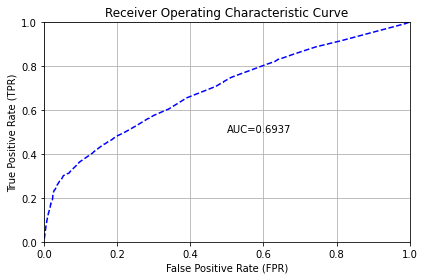

In [ ]:
#3. ROC
best_rf_perf1.plot(type='roc')

## Random Forest

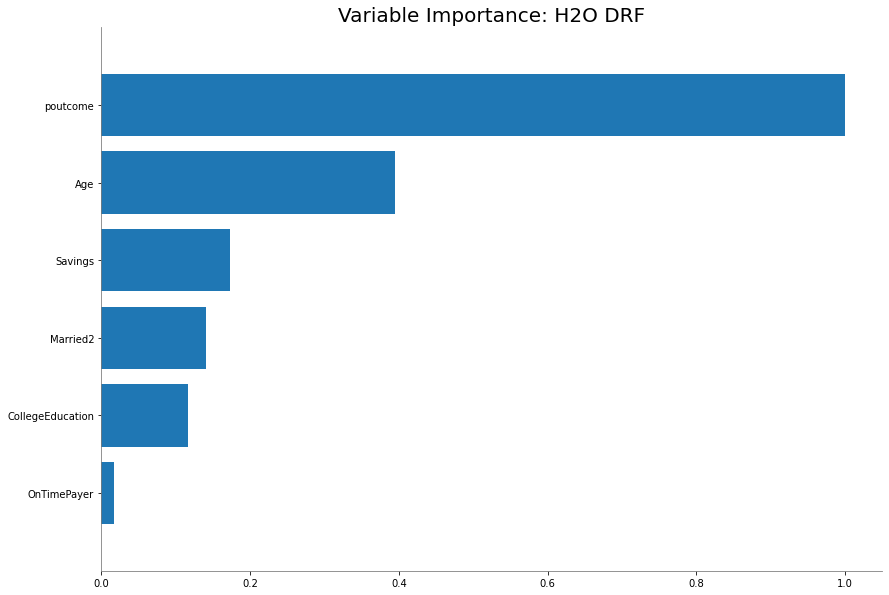

In [ ]:
#4. Variable Importance
best_rf1.varimp_plot(num_of_features=12)

## Logistic Regression  (GLM)
#####  Prepare Logistic Regression  (GLM) a different method argument of "glm" (for generalized  linear models) is used.  A logistic Regression doesn't have turning parameters.  So, in GLM resampling can be used to characterize the performance of the model. 
######  Kuhn, Max; Johnson, Kjell. Applied Predictive Modeling (p. 87). 

In [ ]:
#D. Train Logistic Regression
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch

glm_grid1 = H2OGridSearch(model=H2OGeneralizedLinearEstimator,
                          grid_id='glm_grid1',
                          hyper_params=hyper_params_glm,
                          search_criteria=search_criteria
                         )
glm_grid1.train(x=x, y=y,
                training_frame=trn_h,
                stopping_metric = "misclassification", stopping_tolerance = 1e-3, 
							  stopping_rounds = 3,
							  nfolds = 5, fold_assignment = "Modulo", 
                balance_classes = True,
							  keep_cross_validation_predictions = True,
                standardize = True,                   
                family = "binomial",
                lambda_search=False,
                seed=1
               )
# Get the grid results, sorted by validation error
#G. Evaluate
glm_gridperf1 = glm_grid1.get_grid(sort_by='err', decreasing=True)

# Grab the top GLM model, chosen by validation error
best_glm1 = glm_gridperf1.models[0]

glm Grid Build progress: |████████████████████████████████████████████████| 100%


/usr/local/lib/python3.7/dist-packages/h2o/job.py:72: UserWarning: Reached maximum number of iterations 50!
  warnings.warn(w)


In [ ]:
## Get the grid results, sorted by validation error
glm_gridperf1 = rf_grid1.get_grid(sort_by='err', decreasing=True)

In [ ]:
#D. Evaluate
best_glm1 = glm_gridperf1.models[0]

#1. AUC
best_glm_perf1 = best_glm1.model_performance(tst_h)
best_glm_perf1.auc()

0.6937178817176204

In [ ]:
#2. Confusion Matrix
best_glm_perf1


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.09326711537898513
RMSE: 0.3053966525340203
LogLoss: 0.3362005121203129
Mean Per-Class Error: 0.34198555048529733
AUC: 0.7100942293044448
AUCPR: 0.32712495040836853
Gini: 0.42018845860888954

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14150914417679172: 


,,0,1,Error,Rate
0,0,7027.0,942.0,0.1182,(942.0/7969.0)
1,1,623.0,450.0,0.5806,(623.0/1073.0)
2,Total,7650.0,1392.0,0.1731,(1565.0/9042.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.141509,0.365112,80.0
1,max f2,0.103423,0.456256,105.0
2,max f0point5,0.350140,0.413821,40.0
3,max accuracy,0.394332,0.888963,32.0
4,max precision,0.638416,0.703226,17.0
5,max recall,0.000000,1.000000,140.0
6,max specificity,1.000000,0.999749,0.0
7,max absolute_mcc,0.233722,0.290375,52.0
8,max min_per_class_accuracy,0.103423,0.655172,105.0
9,max mean_per_class_accuracy,0.107021,0.658014,102.0



Gains/Lift Table: Avg response rate: 11.87 %, avg score: 11.54 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010728,0.676979,5.386228,5.386228,0.639175,0.731371,0.639175,0.731371,0.057782,0.057782,438.622803,438.622803,0.053390
1,2,0.020349,0.637656,5.908474,5.633160,0.701149,0.646812,0.668478,0.691389,0.056850,0.114632,490.847447,463.315977,0.106977
2,3,0.030082,0.447915,4.213420,5.173832,0.500000,0.557659,0.613971,0.648124,0.041007,0.155638,321.342032,417.383230,0.142462
3,4,0.042247,0.347783,3.447344,4.676676,0.409091,0.367000,0.554974,0.567172,0.041938,0.197577,244.734390,367.667595,0.176244
4,5,0.051758,0.254127,3.037582,4.375475,0.360465,0.282775,0.519231,0.514911,0.028891,0.226468,203.758209,337.547494,0.198233
5,6,0.110927,0.164981,2.047644,3.133810,0.242991,0.184901,0.371884,0.338883,0.121156,0.347623,104.764352,213.381013,0.268567
6,7,0.153948,0.141509,1.668038,2.724194,0.197943,0.147190,0.323276,0.285314,0.071761,0.419385,66.803786,172.419417,0.301177
7,8,0.235789,0.118242,1.036274,2.138331,0.122973,0.122100,0.253752,0.228664,0.084809,0.504194,3.627365,113.833057,0.304545
8,9,0.332117,0.108619,1.073914,1.829604,0.127440,0.112387,0.217116,0.194939,0.103448,0.607642,7.391425,82.960376,0.312624
9,10,0.415505,0.103348,0.894094,1.641854,0.106101,0.103868,0.194836,0.176661,0.074557,0.682199,-10.590550,64.185450,0.302604


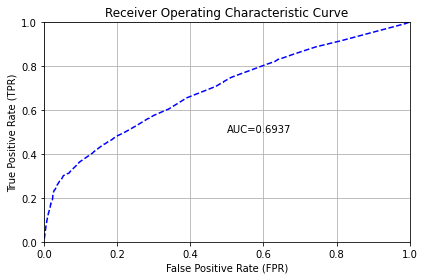

In [ ]:
#3. ROC
best_glm_perf1.plot(type='roc')

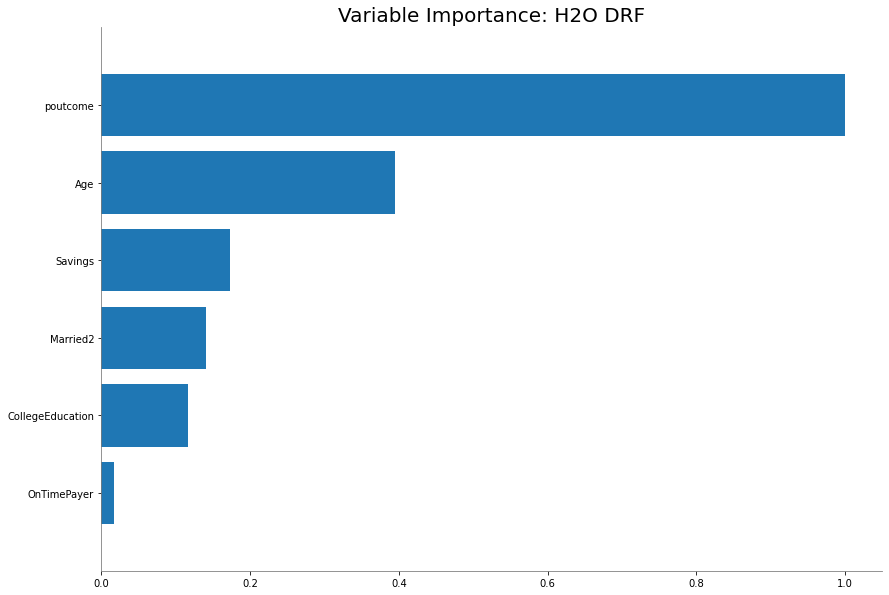

In [ ]:
#4. Variable Importance
best_glm1.varimp_plot(num_of_features=12)

# More Questions

## 1. ## Which features are NOT important in the model? Why do you think that is?


In [ ]:
## ## The variables created as new features that were NOT very important are
## ##  OnTime Payer and College Education. 
## ##  Martial attritube was grouped as a new feature, Married and Not Married,
## ##  and it ranked very close to the bottom with College Education &
## ##  OnTime Payer. 
## ##  

## ##  According to this run of the model poutcome is important to the model at
## ##  100%. 

### 2. ##   Were any of the features you developed important in either model?


In [ ]:
## ## The variables, Age and Savings ranked higher in importance compared
## ##  On Time Payer, and College Education. 
## ##
## ##  In next go around, I plan to learn how to make features that are
## ##  "group" together.  These new features combined with each
## ##  other and the original variables will hopefully show importance.
## ## 

### 3. ##  Why do you think they were (or where not)?



In [ ]:
## ##  There are usually a variety of reasons variables demonstrate importance.
## ##  The OnTime Payer attribute is a new feature created by folks who are
## ##  recognized as default / or late on payments.  Previously, it was higher
## ##  in importance.  In the new feature, OnTimePayer, less than a 1000  
## ##  of the more than 45K of the dataset were recognized as default /
## ##  or late on payments.  So, the low importance makes sense in this feature
## ##  could contribute to the low performance in this model. 
## ##   
## ##  The College Educated group was disproportional amount in the dataset. 
## ##  Only 13K of the 45K were categorized as 'yes' on college educated.   
## ##  In my next go around, College Educated group combined with a variable 
## ##  like job type or another higher performing would possibly improve the 
## ##  outcome or predictive capability
## ##   
## ##  Age continues to be an important variable and would like improve other
## ##  variables when combined with other variables for my next go at this.
## ##  Savings and Married attritubes may improve when combined with higher 
## ##  important variables in new features created in the future. 
## ##
## ##  ## ## 

### 4. ## Did the importance change between the modeling algorithms?


In [ ]:
## ##  This exercise did show an important change in the modeling algorithms. 
## ##
## ##  H2O was used this time and it has advantages in tuning parameters.  
## ##  The H20 used in classification models allows provide important metrics, 
## ##  measures and outcome when the model is run like returns on error rate
## ##  for each iteration of the training process. A score for the model at each
## ##  iteration is calculated and can be stopped, so the process does not go on
## ##  and on.  This can be helpful when models are especially complex. Also, it 
## ##  provides information about the importance of each feature in the 
## ##  overall model. 

## ##  Additional change in this analysis includes, but are limited to the
## ##  results are"comprised of a model key and a confusion matrix. 
## ##  According to the H20 Documentation, the model key specifies 
## ### the full forest of trees to be used for predicting classifications.  
## ##  As a result it is more comprehensive in its outcomes and reassuring to 
## ## an analyst. 

## 5. ## Calculate the overall Accuracy of each model?



In [ ]:
## ##  My model is okay. The rate achieved represents improvement in the AUC 
## ##  higher than last time which was 0.50 (50%).
## ##  The overall AUC of each model is improvement from previous runs.  
## ##  
## ##  Accuracy is good.  But it is important for the model to reliable.  These
## ##  are improving.  And with time and experience they may be able to get 
## ##  a little higher. 

### 6. ##  Do you think your model has a reliable prediction? Why or Why Not?


In [ ]:
 This time both models showed a 
## ##  rate of 69% - 71% reliability.  I would like to see it get higher.  
## ##  
## ##  More features and research on the variables created by others would be 
## ## beneficial. 

### 7. ###   Which model would you choose and why?

In [ ]:
## ## For this case and if I had opportunity to work with a computer that could 
## ## handle big data, I would like to try this with neural networks.  Neural 
## ## seems right for this model because there is not yet a "silverbullet" to the
## ## right set of variables to make a bank problem a easy one to solve by
## ## identifying the perfect mix of characteristics to predict at a high
## ## rate the right potential customer for the account they are promoting. 
## ## Neural networks works like a human brain, of sorts, and continues to 
## ## learn about the variables to seek better outcomes, predictions. 
## ## 
## ## Neural nets works like a human, especially how a human can try, fail, try again. 
## ## The failures are logged and a new way is attempted until success is 
## ## achieved.  It works with binary data and logistic regression models as it 
## ## seeks success trhough binary data outcomes, like "yes", "no", or “Correct” 
## ##  or“Incorrect." 
## ##  Many folks have used this dataset, but it is unknown to me if it has been 
## ## run through a neural network to optimize the predictive qualities.  Yet, 
## ## it has, the bank would be a quite success in identifying targeted customers.
## ## Neural networks eventually, through supervision, how to discern the correct
## ## response, outcome or prediction in every instance because the machine learns
## ##  by feeding the “no” or the error back through each layer (or step).
## ## The process gradually learns, and adapts, to the correct response.
## ##  Neural network also has layers. The layers, work with many neurons together
## ## According to the lecture it works the same way, but in parallel
## ##  Each neuron evaluates based on the weighted sum and only one fires to 1,
## ## while  the rest fire 0.  Although Bayes is better and cleaner. Yet, it 
## ## would interesting to see the results, especially 
## ##   because the human factors in this dataset and
## ## and trying eliminate the uncertainity prevailant and hard to predict in 
## ## humans, especially in a dataset.  :) 